In [19]:
pip install seaborn


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

<H1 style="color:red"> Loading Data</H1>

In [21]:
df = pd.read_csv("C:/Users/Admin/Downloads/support vector method.csv", sep = ",")

In [22]:
df = df['age,sex,bmi,children,smoker,region,charges'].str.split(",",expand = True)


In [23]:
df.columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [24]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.88,0,no,northwest,3866.8552


In [25]:
convert_dict = {'age': int,
                'sex': str,
                'bmi': float,
                'children' : int,
                'smoker' : str,
                'region' : str,
                'charges' : float
                }
df = df.astype(convert_dict)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int32  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int32  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(2), object(3)
memory usage: 62.8+ KB


In [27]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<H1 style="color:red"> Feature Engineering </H1>

In [28]:
male = pd.get_dummies(df['sex'],dtype=int,drop_first=True)
df = pd.concat([df, male], axis = 1)
df


,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [29]:
smoker = pd.get_dummies(df['smoker'],dtype=int,drop_first=True)
df = pd.concat([df, smoker], axis = 1)
df

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [30]:
df.rename(columns = {'yes':'smoking'}, inplace = True)

In [31]:
df

,age,sex,bmi,children,smoker,region,charges,male,smoking
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [32]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [33]:
smoker = pd.get_dummies(df['region'],dtype=int,drop_first=True)
df = pd.concat([df, smoker], axis = 1)
df

,age,sex,bmi,children,smoker,region,charges,male,smoking,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0,0,1


<H1 style="color:red"> Exploratory analysis </H1>

In [34]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

# Distribution of sex parameter

# Relationship of Smoking and gender to charges

### Understanding the corelations of different parameters ex: if y= x if x increases then y increases that means +ve co-relation if x increases and y decreases that means -ve co-relation so if it is +ve corelation it will be +1, for -ve co-relation it will be -1 , and for no corelation it will be 0

## Please make sure that the data is in correct schema as it might affect the plotting pattern

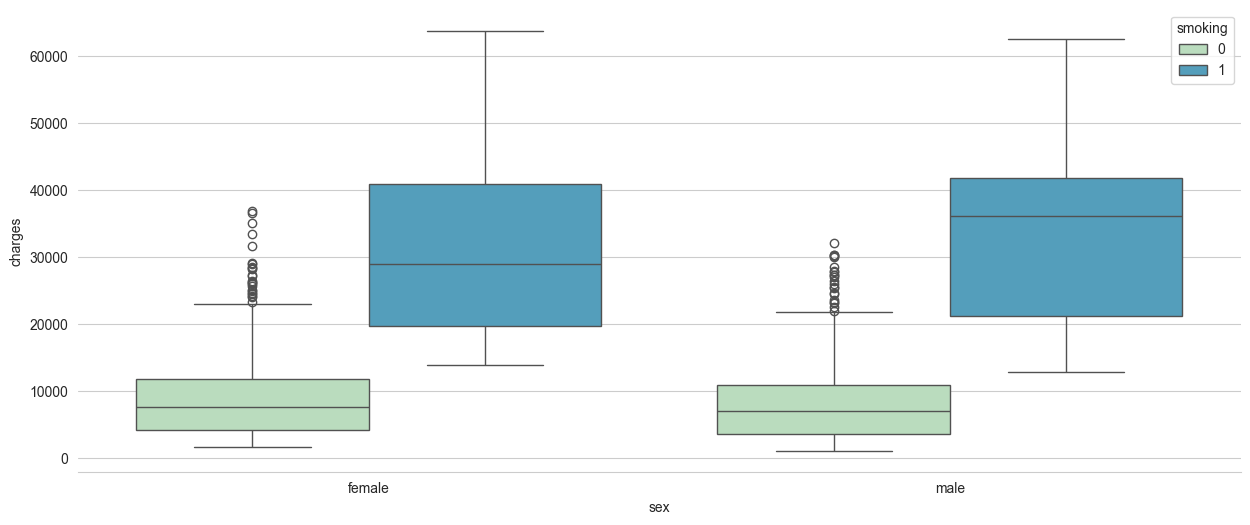

In [45]:
plt.figure(figsize = (15,6))
sns.set_style("whitegrid")
sns.boxplot(x = 'sex',y = 'charges', data = df,hue='smoking', palette  ="GnBu")
sns.despine(left  =True)
plt.show()

## with the  age and who does smoking it makes it a strong parameter to make the charges high

## age is a string parameter

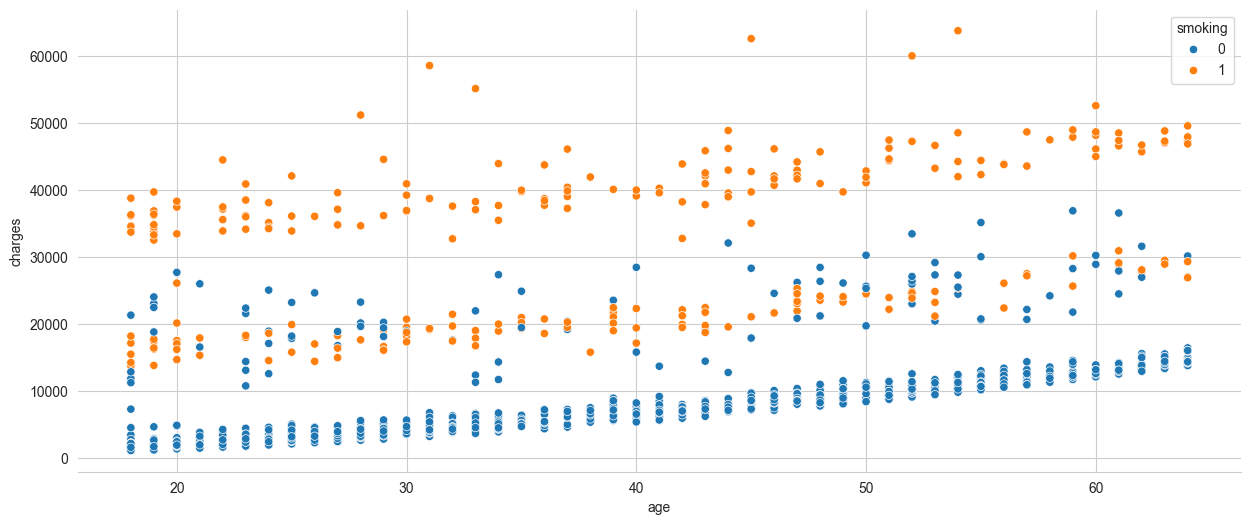

In [50]:
plt.figure(figsize = (15,6))
sns.set_style("whitegrid")
sns.scatterplot(x = 'age',y = 'charges', data = df,hue='smoking')
# sns.scatterplot(x = 'sex',y = 'charges', data = df,hue='smoking', palette  ="GnBu")
sns.despine(left  =True)
plt.show()

<H1 style="color:green"> # ##** BMI and the age to check the influence on charges ** </H1> 


<H2 style="color:Blue"> BMI is a strong parameters to check for the charges </H2> 

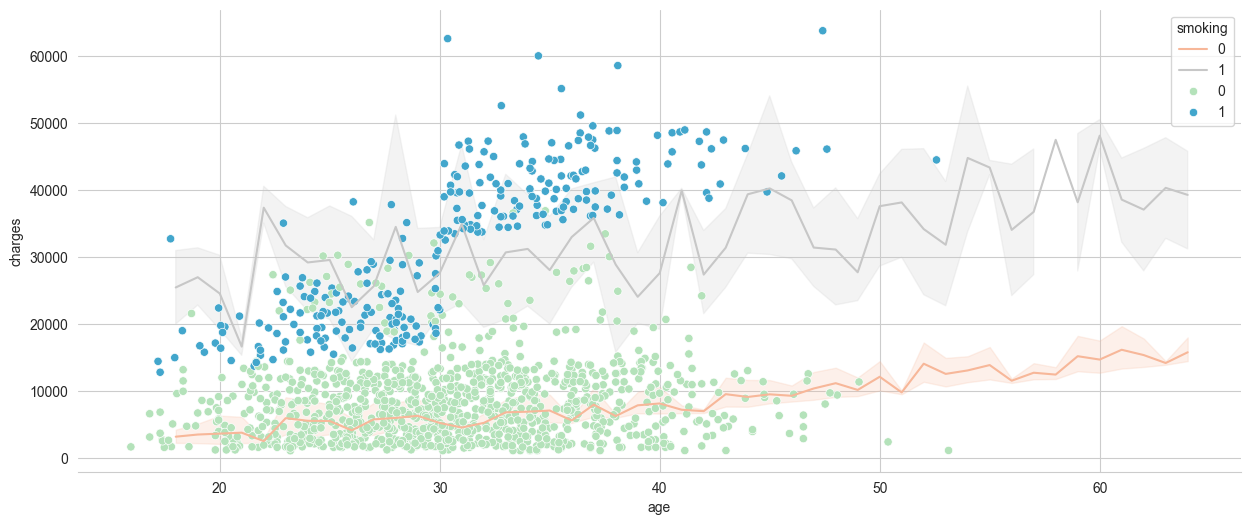

In [61]:
plt.figure(figsize = (15,6))
sns.set_style("whitegrid")
sns.lineplot(x = 'age',y = 'charges', data = df,hue='smoking',palette  ="RdGy")
sns.scatterplot(x = 'bmi',y = 'charges', data = df,hue='smoking', palette  ="GnBu")

sns.despine(left  =True)
plt.show()

# Comparing the BMI, charge, and the gender

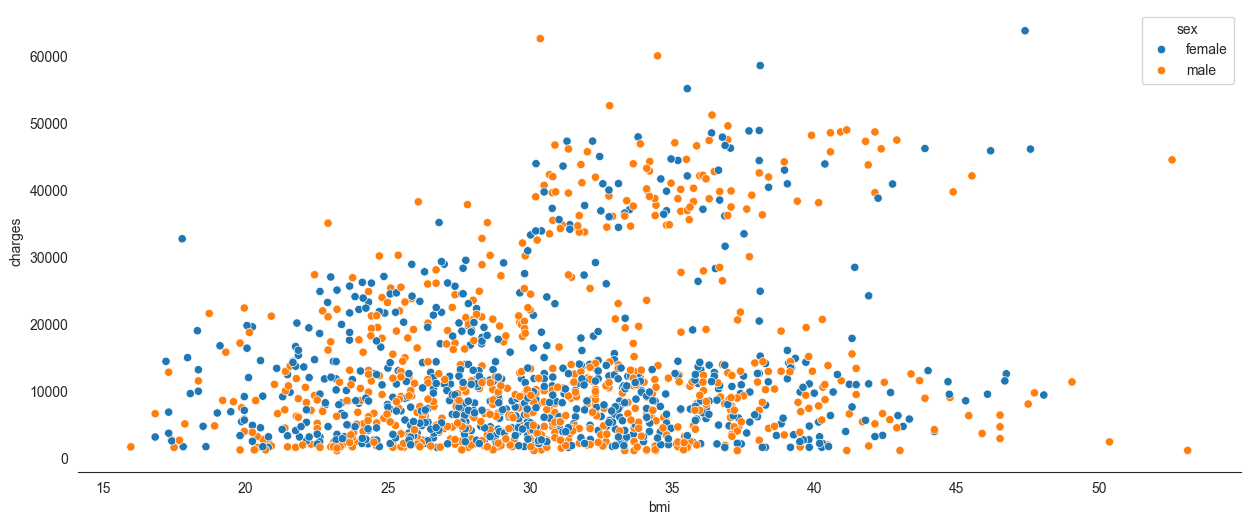

In [67]:
plt.figure(figsize = (15,6))
sns.set_style("white")
sns.scatterplot(x = 'bmi',y = 'charges', data = df,hue='sex')


sns.despine(left  =True)
plt.show()

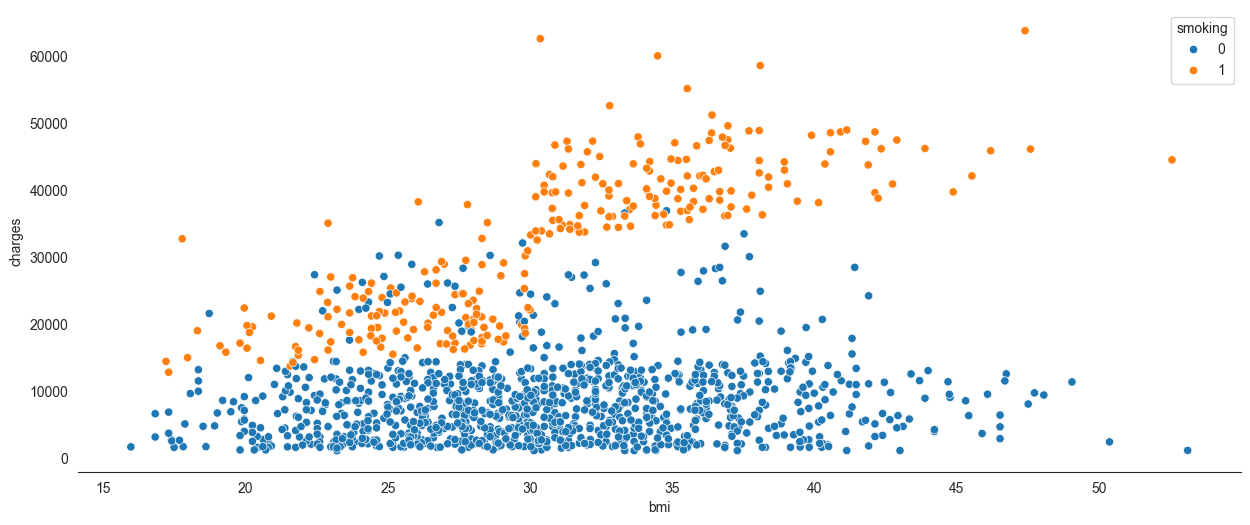

In [66]:
plt.figure(figsize = (15,6))
sns.set_style("white")
sns.scatterplot(x = 'bmi',y = 'charges', data = df,hue='smoking')


sns.despine(left  =True)
plt.show()

# to merge two plots